# Bank Churn Prediction - Case Study - Tensorflow 2.0.0

## Data Dictionary

There are 25 variables:

*	**ID:** ID of each client
*	**LIMIT_BAL:** Amount of given credit in NT dollars (includes individual and family/supplementary credit
*	**SEX:** Gender (1=male, 2=female)
*	**EDUCATION:** (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
*	**MARRIAGE:** Marital status (1=married, 2=single, 3=others)
*	**AGE:** Age in years
*	**PAY_0:** Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, ... 8=payment delay for eight months, 9=payment delay for nine months and above)
*	**PAY_2:** Repayment status in August, 2005 (scale same as above)
*	**PAY_3:** Repayment status in July, 2005 (scale same as above)
*	**PAY_4:** Repayment status in June, 2005 (scale same as above)
*	**PAY_5:** Repayment status in May, 2005 (scale same as above)
*	**PAY_6:** Repayment status in April, 2005 (scale same as above)
*	**BILL_AMT1:** Amount of bill statement in September, 2005 (NT dollar)
*	**BILL_AMT2:** Amount of bill statement in August, 2005 (NT dollar)
*	**BILL_AMT3:** Amount of bill statement in July, 2005 (NT dollar)
*	**BILL_AMT4:** Amount of bill statement in June, 2005 (NT dollar)
*	**BILL_AMT5:** Amount of bill statement in May, 2005 (NT dollar)
*	**BILL_AMT6:** Amount of bill statement in April, 2005 (NT dollar)
*	**PAY_AMT1:** Amount of previous payment in September, 2005 (NT dollar)
*	**PAY_AMT2:** Amount of previous payment in August, 2005 (NT dollar)
*	**PAY_AMT3:** Amount of previous payment in July, 2005 (NT dollar)
*	**PAY_AMT4:** Amount of previous payment in June, 2005 (NT dollar)
*	**PAY_AMT5:** Amount of previous payment in May, 2005 (NT dollar)
*	**PAY_AMT6:** Amount of previous payment in April, 2005 (NT dollar)
*	**default.payment.next.month:** Default payment (1=yes, 0=no)


In [1]:
root_dir = ''
try:
    from google.colab import drive
    drive.mount('/content/drive')
    root_dir = '/content/drive/My Drive/Colab Notebooks/tensorflow-2-projects/'
    
    !pip install tensorflow-gpu
except:
    print('No GOOGLE DRIVE connection. Using local dataset(s).')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive
     |████████████████████████████████| 380.8MB 69kB/s 
     |████████████████████████████████| 3.8MB 34.7MB/s 
     |████████████████████████████████| 450kB 44.2MB/s 
ERROR: tensorflow 1.15.0rc3 has requirement tensorboard<1.16.0,>=1.15.0, but you'll have tensorboard 2.0.0 which is incompatible.
ERROR: tensorflow 1.15.0rc3 has requirement tensorflow-estimator==1.15.1, but you'll have tensorflow-estimator 2.0.1 which is incompatible.
  Found existing installat

In [0]:
import os, sys, random
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns

import missingno as msno

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import tensorflow as tf

In [3]:
print(tf.version.VERSION)
print('GPU is', 'available' if tf.config.experimental.list_physical_devices('GPU') else 'NOT AVAILABLE')

2.0.0
GPU is available


In [4]:
seed = 321

random.seed(seed)
np.random.seed(seed)
tf.random.set_seed(seed)

%matplotlib inline

plt.figure(figsize = (14, 11))
plt.style.use('bmh')

colors = mcolors.TABLEAU_COLORS
sns.set(rc={'figure.figsize' : (14, 11), 'figure.facecolor': 'whitesmoke', 'axes.facecolor': 'whitesmoke', 'grid.color': 'slategrey'})
sns.color_palette(palette = list(colors.values()));

<Figure size 1008x792 with 0 Axes>

## Load the Data

In [5]:
bankchurn_dataset = pd.read_csv(root_dir + 'datasets/bank_churn_prediction-classification.csv', encoding='utf-8')
bankchurn_dataset.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


## Data Insights

In [6]:
bankchurn_dataset.shape

(30000, 25)

In [7]:
bankchurn_dataset.dtypes

ID                            int64
LIMIT_BAL                     int64
SEX                           int64
EDUCATION                     int64
MARRIAGE                      int64
AGE                           int64
PAY_0                         int64
PAY_2                         int64
PAY_3                         int64
PAY_4                         int64
PAY_5                         int64
PAY_6                         int64
BILL_AMT1                     int64
BILL_AMT2                     int64
BILL_AMT3                     int64
BILL_AMT4                     int64
BILL_AMT5                     int64
BILL_AMT6                     int64
PAY_AMT1                      int64
PAY_AMT2                      int64
PAY_AMT3                      int64
PAY_AMT4                      int64
PAY_AMT5                      int64
PAY_AMT6                      int64
default payment next month    int64
dtype: object

In [8]:
bankchurn_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID                            30000 non-null int64
LIMIT_BAL                     30000 non-null int64
SEX                           30000 non-null int64
EDUCATION                     30000 non-null int64
MARRIAGE                      30000 non-null int64
AGE                           30000 non-null int64
PAY_0                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null int64
BILL_AMT2                     30000 non-null int64
BILL_AMT3                     30000 non-null int64
BILL_AMT4                     30000 non-null int64
BILL_AMT5                     30000 non-null int64
BILL_AMT6               

In [9]:
bankchurn_dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,30000.0,15000.500000,8660.398374,1.0,7500.75,15000.5,22500.25,30000.0
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
MARRIAGE,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_0,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0


In [10]:
bankchurn_dataset.nunique()

ID                            30000
LIMIT_BAL                        81
SEX                               2
EDUCATION                         7
MARRIAGE                          4
AGE                              56
PAY_0                            11
PAY_2                            11
PAY_3                            11
PAY_4                            11
PAY_5                            10
PAY_6                            10
BILL_AMT1                     22723
BILL_AMT2                     22346
BILL_AMT3                     22026
BILL_AMT4                     21548
BILL_AMT5                     21010
BILL_AMT6                     20604
PAY_AMT1                       7943
PAY_AMT2                       7899
PAY_AMT3                       7518
PAY_AMT4                       6937
PAY_AMT5                       6897
PAY_AMT6                       6939
default payment next month        2
dtype: int64

In [11]:
bankchurn_dataset.isnull().sum(axis=0)

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

In [12]:
bankchurn_dataset.isna().sum(axis=0)

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

In [13]:
label, count = np.unique(bankchurn_dataset['SEX'], return_counts=True)

print(np.asarray((label, count)).T)

[[    1 11888]
 [    2 18112]]


In [14]:
label, count = np.unique(bankchurn_dataset['default payment next month'], return_counts=True)

print(np.asarray((label, count)).T)

[[    0 23364]
 [    1  6636]]


In [15]:
bankchurn_dataset['default payment next month'].value_counts(normalize=True) * 100

0    77.88
1    22.12
Name: default payment next month, dtype: float64

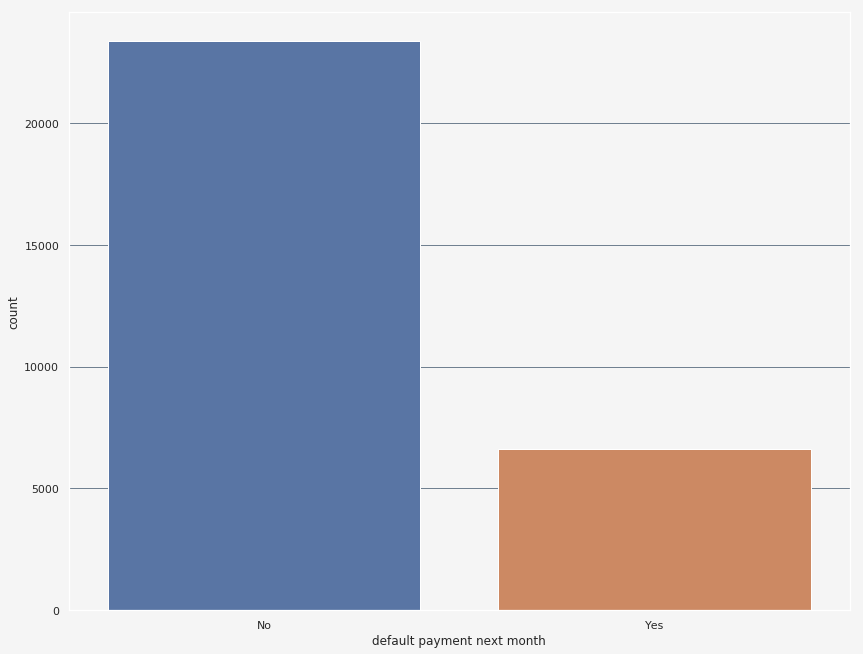

In [16]:
sns.countplot(x=bankchurn_dataset['default payment next month'])
locs, labels = plt.xticks()
plt.xticks(ticks=locs, labels=['No', 'Yes'])
plt.show()

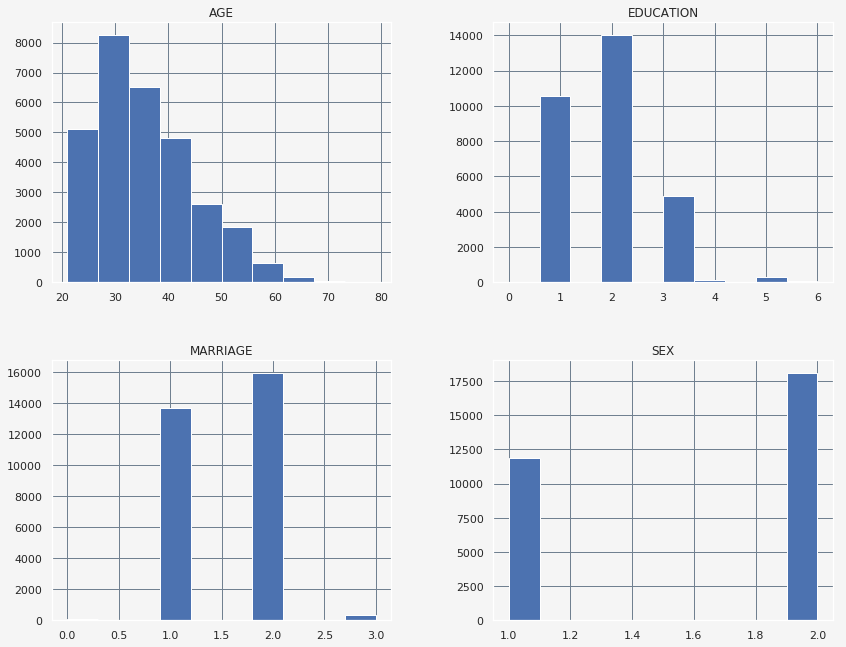

In [17]:
bankchurn_dataset[['SEX', 'EDUCATION', 'MARRIAGE', 'AGE']].hist();

In [0]:
sex_dataset = pd.get_dummies(bankchurn_dataset['SEX'], prefix='SEX', drop_first=True)
bankchurn_dataset = pd.concat([bankchurn_dataset, sex_dataset], axis=1)

In [0]:
education_dataset = pd.get_dummies(bankchurn_dataset['EDUCATION'], prefix='EDUCATION', drop_first=True)
bankchurn_dataset = pd.concat([bankchurn_dataset, education_dataset], axis=1)

In [0]:
marriage_dataset = pd.get_dummies(bankchurn_dataset['MARRIAGE'], prefix='MARRIAGE', drop_first=True)
bankchurn_dataset = pd.concat([bankchurn_dataset, marriage_dataset], axis=1)

In [21]:
print(np.min(bankchurn_dataset['AGE']))
print(np.max(bankchurn_dataset['AGE']))

21
79


In [0]:
# Taking age range up to 80 omits (75, 80] thus have to take range up to 85. Because upper boundary ignored.
ageGroups = list(range(20, 85, 5))

ageGroupRanges = pd.cut(bankchurn_dataset['AGE'], ageGroups).to_frame()
ageGroupRanges.columns = ["AGE_RANGE"]

bankchurn_dataset = pd.concat([bankchurn_dataset, ageGroupRanges], axis=1)

In [23]:
bankchurn_dataset['AGE_RANGE'].dtype

CategoricalDtype(categories=[(20, 25], (25, 30], (30, 35], (35, 40], (40, 45] ... (55, 60], (60, 65], (65, 70], (70, 75], (75, 80]],
              ordered=True)

In [0]:
bankchurn_dataset['AGE_RANGE'] = bankchurn_dataset['AGE_RANGE'].astype('str')

In [25]:
agerange_dataset = pd.get_dummies(bankchurn_dataset['AGE_RANGE'], prefix='AGE', drop_first=True)
bankchurn_dataset = pd.concat([bankchurn_dataset, agerange_dataset], axis=1)
bankchurn_dataset.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,SEX_2,EDUCATION_1,EDUCATION_2,EDUCATION_3,EDUCATION_4,EDUCATION_5,EDUCATION_6,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3,AGE_RANGE,"AGE_(25, 30]","AGE_(30, 35]","AGE_(35, 40]","AGE_(40, 45]","AGE_(45, 50]","AGE_(50, 55]","AGE_(55, 60]","AGE_(60, 65]","AGE_(65, 70]","AGE_(70, 75]","AGE_(75, 80]"
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1,1,0,1,0,0,0,0,1,0,0,"(20, 25]",0,0,0,0,0,0,0,0,0,0,0
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1,1,0,1,0,0,0,0,0,1,0,"(25, 30]",1,0,0,0,0,0,0,0,0,0,0
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0,1,0,1,0,0,0,0,0,1,0,"(30, 35]",0,1,0,0,0,0,0,0,0,0,0
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0,1,0,1,0,0,0,0,1,0,0,"(35, 40]",0,0,1,0,0,0,0,0,0,0,0
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0,0,0,1,0,0,0,0,1,0,0,"(55, 60]",0,0,0,0,0,0,1,0,0,0,0


In [26]:
bankchurn_dataset.drop(['ID', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'AGE_RANGE'], axis=1, inplace=True)
bankchurn_dataset.head()

,LIMIT_BAL,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,SEX_2,EDUCATION_1,EDUCATION_2,EDUCATION_3,EDUCATION_4,EDUCATION_5,EDUCATION_6,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3,"AGE_(25, 30]","AGE_(30, 35]","AGE_(35, 40]","AGE_(40, 45]","AGE_(45, 50]","AGE_(50, 55]","AGE_(55, 60]","AGE_(60, 65]","AGE_(65, 70]","AGE_(70, 75]","AGE_(75, 80]"
0,20000,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,120000,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0
2,90000,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0
3,50000,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0
4,50000,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0


In [0]:
def createFeatureEngineeredColumns(dataset) :
    dataset_tmp = pd.DataFrame()
    
    dataset_tmp['CountOfZeroValues'] = (dataset == 0).sum(axis = 1)
    dataset_tmp['CountOfNonZeroValues'] = (dataset != 0).sum(axis = 1)
    
    weight = ((dataset != 0).sum() / len(dataset)).values
    dataset_tmp['WeightedCount'] = (dataset * weight).sum(axis=1)
    
    dataset_tmp['SumOfValues'] = (dataset).sum(axis=1)
    
    dataset_tmp['VarianceOfValues'] = (dataset).var(axis=1)
    dataset_tmp['MedianOfValues'] = (dataset).median(axis=1)
    dataset_tmp['MeanOfValues'] = (dataset).mean(axis=1)
    dataset_tmp['StandardDeviationOfValues'] = (dataset).std(axis=1)
    dataset_tmp['ModeOfValues'] = (dataset).mode(axis=1)
    dataset_tmp['SkewOfValues'] = (dataset).skew(axis=1)
    dataset_tmp['KurtosisOfValues'] = (dataset).kurtosis(axis=1)
    
    dataset_tmp['MaxOfValues'] = (dataset).max(axis=1)
    dataset_tmp['MinOfValues'] = (dataset).min(axis=1)
    dataset_tmp['DiffOfMinMaxOfValues'] = np.subtract(dataset_tmp['MaxOfValues'] , dataset_tmp['MinOfValues'])
    
    dataset_tmp['QuantilePointFiveOfValues'] = (dataset[ dataset > 0 ]).quantile(0.5, axis=1)
    
    dataset = pd.concat([dataset, dataset_tmp], axis = 1)
    
    return dataset

In [0]:
y = bankchurn_dataset.pop('default payment next month')

bankchurn_dataset = createFeatureEngineeredColumns(bankchurn_dataset)
X = bankchurn_dataset

In [0]:
standardScaler = StandardScaler()

X = standardScaler.fit_transform(X)

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15)
(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

((25500, 55), (4500, 55), (25500,), (4500,))

In [31]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.17)
(X_train.shape, X_val.shape, y_train.shape, y_val.shape)

((21165, 55), (4335, 55), (21165,), (4335,))

In [0]:
# Save the three datasets in *.npz.
np.savez('bankchurn_data_train.npz', inputs=X_train, targets=y_train)
np.savez('bankchurn_data_val.npz', inputs=X_val, targets=y_val)
np.savez('bankchurn_data_test.npz', inputs=X_test, targets=y_test)

# Load all three datasets in temporary variables
train_dataset = np.load('bankchurn_data_train.npz')
validation_dataset = np.load('bankchurn_data_val.npz')
test_dataset = np.load('bankchurn_data_test.npz')

train_inputs, train_targets = train_dataset['inputs'].astype(np.float), train_dataset['targets'].astype(np.int)

validation_inputs, validation_targets = validation_dataset['inputs'].astype(np.float), validation_dataset['targets'].astype(np.int)
test_inputs, test_targets = test_dataset['inputs'].astype(np.float), test_dataset['targets'].astype(np.int)

In [33]:
#input_size = 40
input_size = 55
output_size = 2

hidden_layers = 256

# Set a maximum number of training epochs
max_epochs = 100

# Set an early stopping mechanism
early_stopping = tf.keras.callbacks.EarlyStopping(patience=3)

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(hidden_layers, activation=tf.nn.relu))
model.add(tf.keras.layers.Dropout(0.25))
model.add(tf.keras.layers.Dense(hidden_layers, activation=tf.nn.relu))
model.add(tf.keras.layers.Dropout(0.4))
model.add(tf.keras.layers.Dense(hidden_layers, activation=tf.nn.relu))
model.add(tf.keras.layers.Dropout(0.25))
model.add(tf.keras.layers.Dense(hidden_layers, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(hidden_layers, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(output_size, activation=tf.nn.softmax))

model.compile(optimizer = tf.keras.optimizers.Adam(), loss=tf.keras.losses.sparse_categorical_crossentropy, metrics=['accuracy'])

#model.fit(X_train, y_train, epochs=max_epochs, validation_data=(X_val, y_val), verbose = 1)
history = model.fit(train_inputs, train_targets, epochs=max_epochs, validation_data=(validation_inputs, validation_targets), callbacks=[early_stopping], verbose = 2)

Train on 21165 samples, validate on 4335 samples
Epoch 1/100
21165/21165 - 5s - loss: 0.4772 - accuracy: 0.8042 - val_loss: 0.4427 - val_accuracy: 0.8178
Epoch 2/100
21165/21165 - 3s - loss: 0.4503 - accuracy: 0.8124 - val_loss: 0.4382 - val_accuracy: 0.8210
Epoch 3/100
21165/21165 - 3s - loss: 0.4436 - accuracy: 0.8139 - val_loss: 0.4360 - val_accuracy: 0.8221
Epoch 4/100
21165/21165 - 3s - loss: 0.4416 - accuracy: 0.8147 - val_loss: 0.4412 - val_accuracy: 0.8217
Epoch 5/100
21165/21165 - 3s - loss: 0.4363 - accuracy: 0.8183 - val_loss: 0.4338 - val_accuracy: 0.8279
Epoch 6/100
21165/21165 - 3s - loss: 0.4338 - accuracy: 0.8189 - val_loss: 0.4363 - val_accuracy: 0.8247
Epoch 7/100
21165/21165 - 3s - loss: 0.4330 - accuracy: 0.8188 - val_loss: 0.4328 - val_accuracy: 0.8256
Epoch 8/100
21165/21165 - 3s - loss: 0.4301 - accuracy: 0.8204 - val_loss: 0.4388 - val_accuracy: 0.8238
Epoch 9/100
21165/21165 - 3s - loss: 0.4310 - accuracy: 0.8185 - val_loss: 0.4383 - val_accuracy: 0.8175
Epoch 

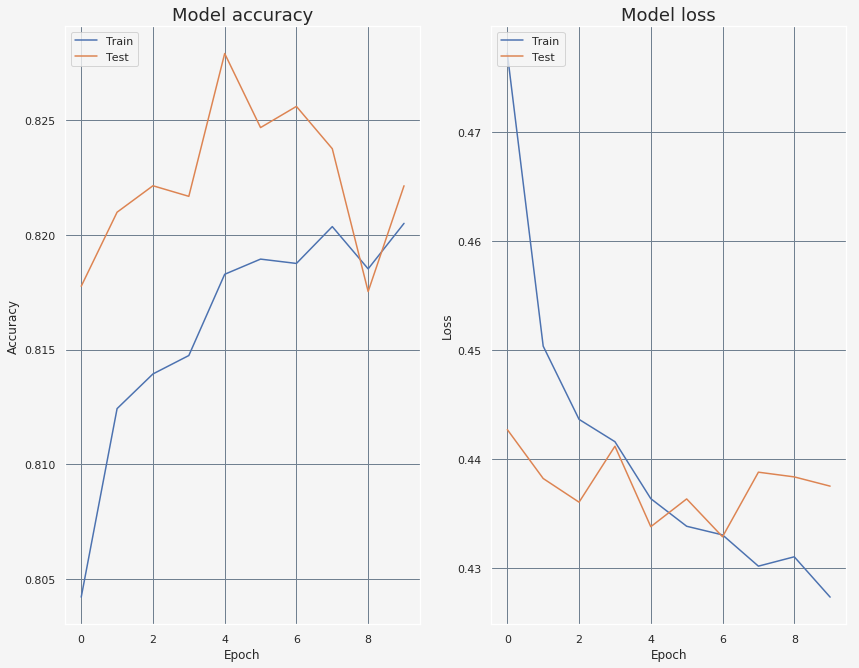

In [34]:
plt.subplot(1,2,1)
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy', fontsize=18)
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.subplot(1,2,2)
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss', fontsize=18)
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.show()

In [35]:
test_loss, test_accuracy = model.evaluate(test_inputs, test_targets, verbose = 2)

print('\nTest loss: {0:.2f}. Test accuracy: {1:.2f}%'.format(test_loss, test_accuracy * 100.0))

4500/1 - 0s - loss: 0.4413 - accuracy: 0.8176

Test loss: 0.44. Test accuracy: 81.76%
